In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

inspired by https://github.com/benmoseley/harmonic-oscillator-pinn/blob/main/Harmonic%20oscillator%20PINN.ipynb and
https://github.com/nanditadoloi/PINN/blob/main/solve_PDE_NN.ipynb and https://towardsdatascience.com/solving-differential-equations-with-neural-networks-afdcf7b8bcc4

In [3]:
def oscillator(d, w0, x):
    """Defines the analytical solution to the 1D underdamped harmonic oscillator problem. 
    Equations taken from: https://beltoforion.de/en/harmonic_oscillator/"""
    assert d < w0
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*x)
    sin = torch.sin(phi+w*x)
    exp = torch.exp(-d*x)
    y  = exp*2*A*cos
    return y

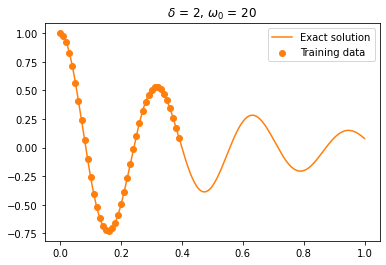

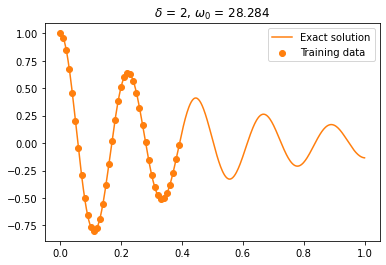

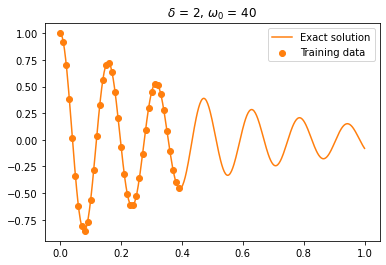

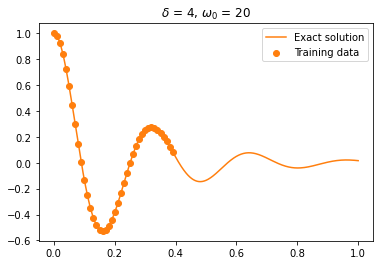

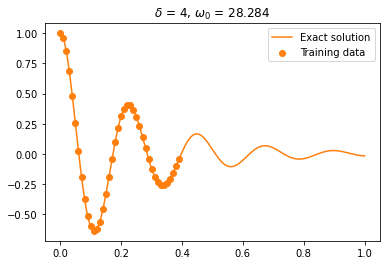

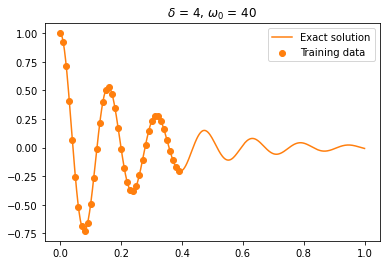

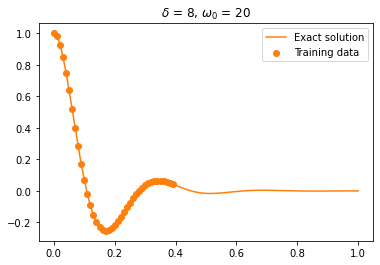

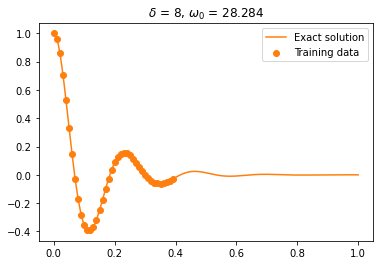

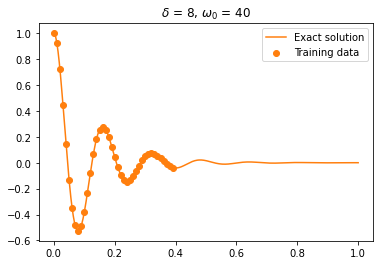

In [4]:
deltas = [2, 4, 8]
# omegas = [np.sqrt(800)]
omegas = [20, np.sqrt(800), 40]

x_train = []
y_train = []
par_train = []

for d in deltas:
    for w0 in omegas:

        # get the analytical solution over the full domain
        x = torch.linspace(0,1,500).view(-1,1)
        y = oscillator(d, w0, x).view(-1,1)
        # print(x.shape, y.shape)

        # slice out a small number of points from the LHS of the domain
        x_data = x[0:200:5]
        y_data = y[0:200:5]
        # print(x_data.shape, y_data.shape)

        # append training data
        x_train.append(x_data.flatten())
        y_train.append(y_data.flatten())
        par_train.append(torch.Tensor([d, w0]))

        plt.figure()
        plt.title(f'$\delta$ = {d}, $\omega_0$ = {np.round(w0,3)}')
        plt.plot(x, y, color="tab:orange", label="Exact solution")
        plt.scatter(x_data, y_data, color="tab:orange", label="Training data")
        plt.legend()
        plt.show()

# convert lists to tensors-arrays
x_train = torch.stack(x_train)
y_train = torch.stack(y_train)
par_train = torch.stack(par_train)
# print(x_train.shape, y_train.shape, par_train.shape)


In [5]:
# define network architecture

class FullyConnected(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_outputs):
    super().__init__()
    self.input = nn.Sequential(
      nn.Linear(n_inputs, n_hidden),
      nn.Tanh(),
    )
    
    self.hidden = nn.Sequential(
      nn.Linear(n_hidden, n_hidden),
      nn.Tanh(),
      nn.Linear(n_hidden, n_hidden),
      nn.Tanh(),
      nn.Linear(n_hidden, n_hidden),
      nn.Tanh(),
    )

    self.output = nn.Sequential(
    nn.Linear(n_hidden, n_hidden),
    nn.Tanh(),
    nn.Linear(n_hidden, n_outputs),
    )

  def forward(self, x):
    x = self.input(x)
    x = self.hidden(x)
    x = self.output(x)
    return x


mu = 4.0, k = 400.0
tensor(2.4574e-10, grad_fn=<MeanBackward0>) tensor(2.0772, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MeanBackward0>)


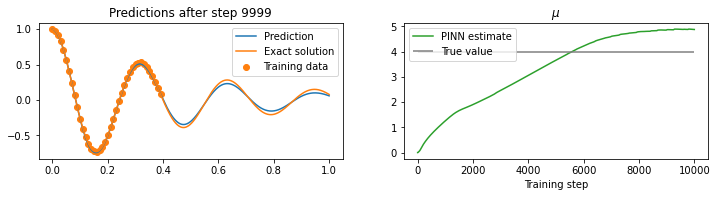

tensor(6.8032e-08, grad_fn=<MeanBackward0>) tensor(1.3483, grad_fn=<MeanBackward0>) tensor(6.2068e-06, grad_fn=<MeanBackward0>)


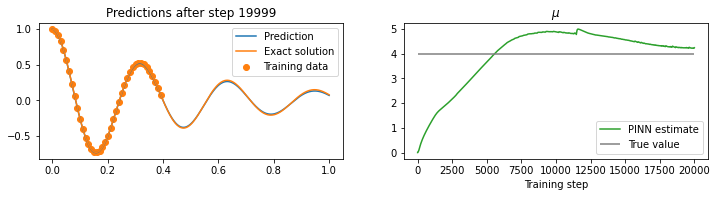

tensor(3.3650e-06, grad_fn=<MeanBackward0>) tensor(1.6164, grad_fn=<MeanBackward0>) tensor(1.2973e-05, grad_fn=<MeanBackward0>)


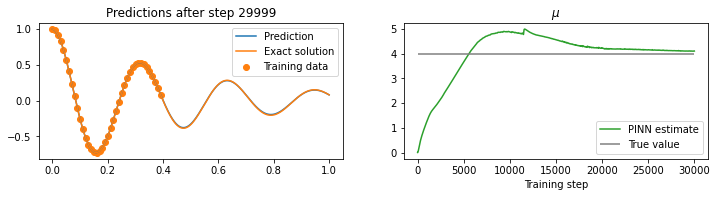

tensor(2.8437e-06, grad_fn=<MeanBackward0>) tensor(0.5250, grad_fn=<MeanBackward0>) tensor(3.8517e-06, grad_fn=<MeanBackward0>)


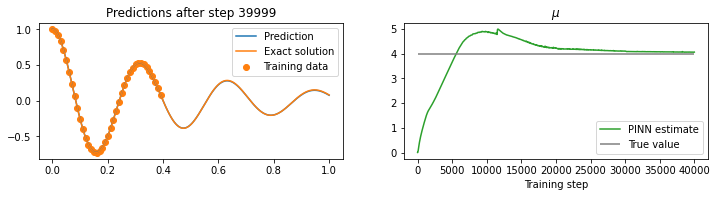

tensor(9.0381e-06, grad_fn=<MeanBackward0>) tensor(2.6858, grad_fn=<MeanBackward0>) tensor(1.2283e-05, grad_fn=<MeanBackward0>)


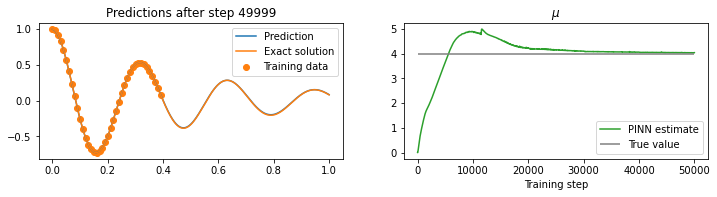

mu = 4.0, k = 800.0
tensor(0.0003, grad_fn=<MeanBackward0>) tensor(119.4729, grad_fn=<MeanBackward0>) tensor(0.0122, grad_fn=<MeanBackward0>)


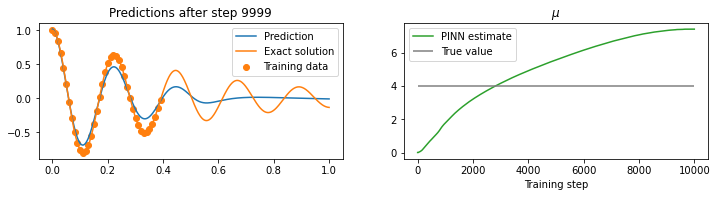

tensor(6.9950e-05, grad_fn=<MeanBackward0>) tensor(29.2211, grad_fn=<MeanBackward0>) tensor(0.0015, grad_fn=<MeanBackward0>)


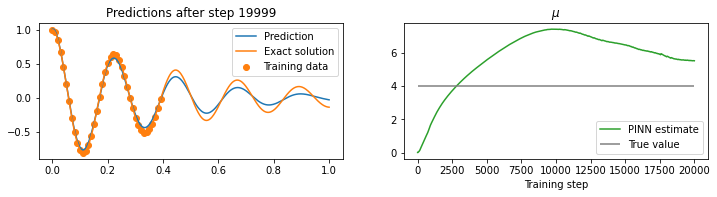

tensor(1.0194e-05, grad_fn=<MeanBackward0>) tensor(2.2549, grad_fn=<MeanBackward0>) tensor(0.0004, grad_fn=<MeanBackward0>)


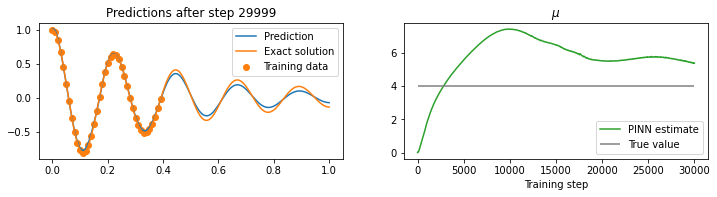

tensor(2.3747e-06, grad_fn=<MeanBackward0>) tensor(19.5565, grad_fn=<MeanBackward0>) tensor(8.2476e-05, grad_fn=<MeanBackward0>)


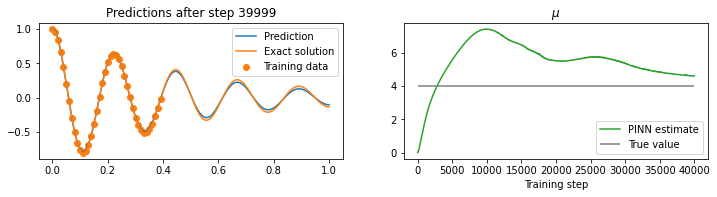

tensor(1.2995e-05, grad_fn=<MeanBackward0>) tensor(12.9579, grad_fn=<MeanBackward0>) tensor(3.3247e-05, grad_fn=<MeanBackward0>)


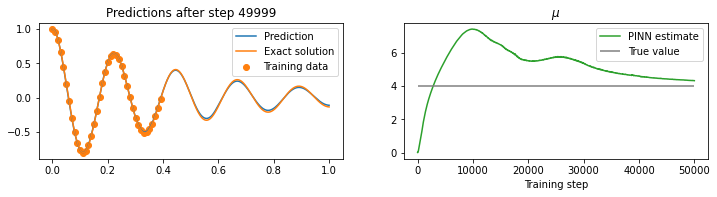

mu = 4.0, k = 1600.0
tensor(0.0001, grad_fn=<MeanBackward0>) tensor(99.4364, grad_fn=<MeanBackward0>) tensor(0.0898, grad_fn=<MeanBackward0>)


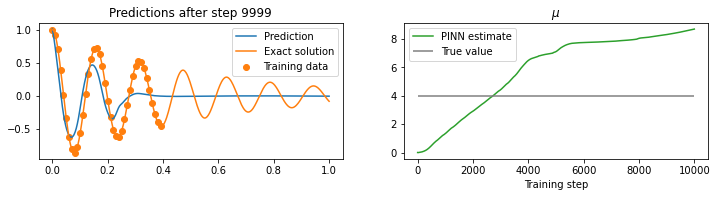

tensor(1.5528e-05, grad_fn=<MeanBackward0>) tensor(102.5766, grad_fn=<MeanBackward0>) tensor(0.0258, grad_fn=<MeanBackward0>)


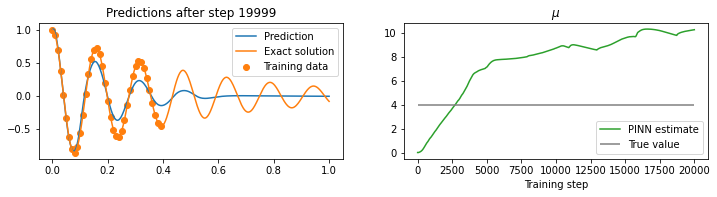

tensor(8.2255e-07, grad_fn=<MeanBackward0>) tensor(5.2476, grad_fn=<MeanBackward0>) tensor(0.0022, grad_fn=<MeanBackward0>)


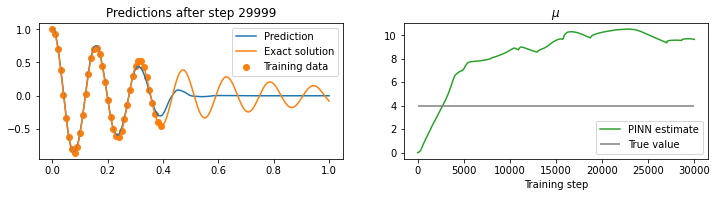

tensor(1.0083e-06, grad_fn=<MeanBackward0>) tensor(6.1241, grad_fn=<MeanBackward0>) tensor(0.0112, grad_fn=<MeanBackward0>)


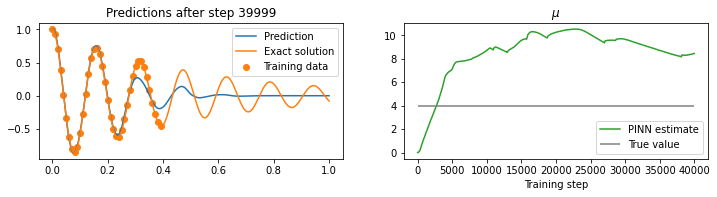

tensor(3.4757e-06, grad_fn=<MeanBackward0>) tensor(10.8570, grad_fn=<MeanBackward0>) tensor(0.0008, grad_fn=<MeanBackward0>)


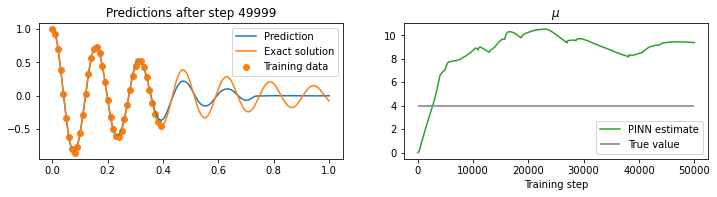

mu = 8.0, k = 400.0
tensor(1.9419e-05, grad_fn=<MeanBackward0>) tensor(3.6852, grad_fn=<MeanBackward0>) tensor(0.0003, grad_fn=<MeanBackward0>)


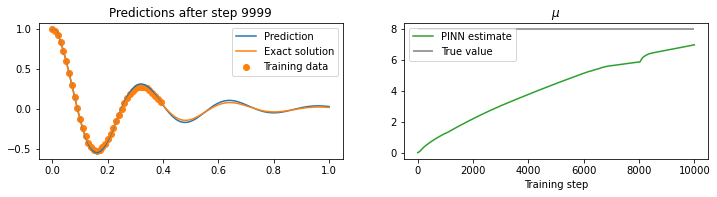

tensor(2.9826e-05, grad_fn=<MeanBackward0>) tensor(12.5480, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MeanBackward0>)


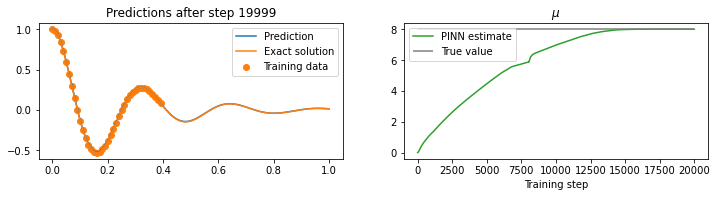

tensor(6.9902e-07, grad_fn=<MeanBackward0>) tensor(0.0982, grad_fn=<MeanBackward0>) tensor(2.4009e-06, grad_fn=<MeanBackward0>)


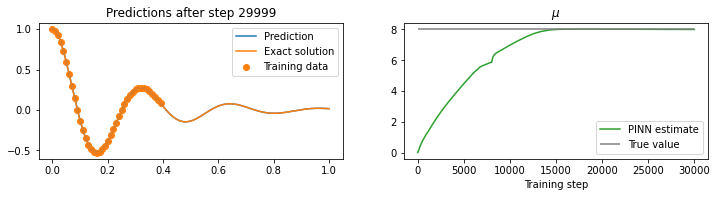

tensor(2.6657e-06, grad_fn=<MeanBackward0>) tensor(2.8395, grad_fn=<MeanBackward0>) tensor(3.6484e-05, grad_fn=<MeanBackward0>)


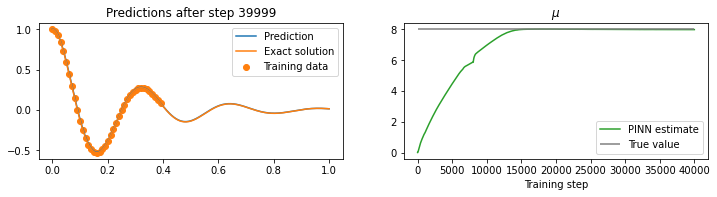

tensor(1.3254e-07, grad_fn=<MeanBackward0>) tensor(0.1644, grad_fn=<MeanBackward0>) tensor(1.4425e-06, grad_fn=<MeanBackward0>)


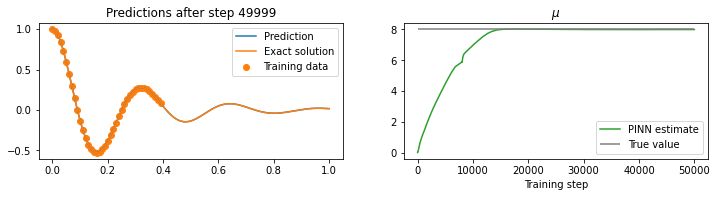

mu = 8.0, k = 800.0
tensor(2.1837e-07, grad_fn=<MeanBackward0>) tensor(51.9153, grad_fn=<MeanBackward0>) tensor(0.0006, grad_fn=<MeanBackward0>)


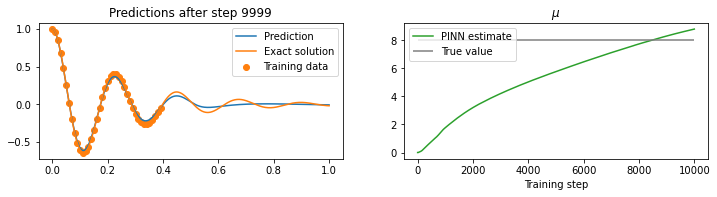

tensor(1.0639e-05, grad_fn=<MeanBackward0>) tensor(5.3548, grad_fn=<MeanBackward0>) tensor(0.0003, grad_fn=<MeanBackward0>)


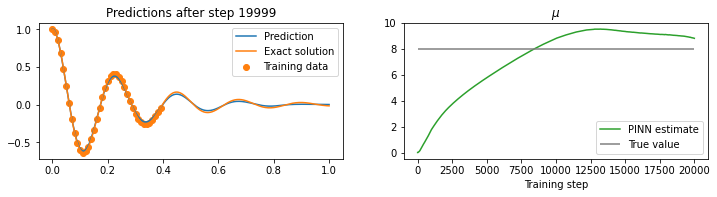

tensor(5.0083e-06, grad_fn=<MeanBackward0>) tensor(3.0974, grad_fn=<MeanBackward0>) tensor(3.7458e-05, grad_fn=<MeanBackward0>)


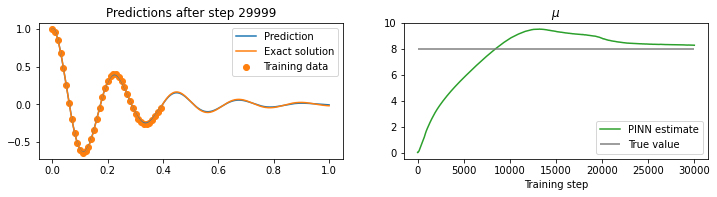

tensor(1.2384e-07, grad_fn=<MeanBackward0>) tensor(0.1421, grad_fn=<MeanBackward0>) tensor(8.6492e-06, grad_fn=<MeanBackward0>)


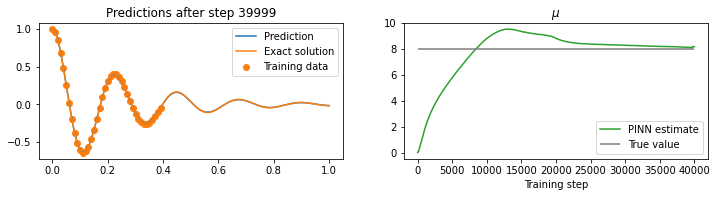

tensor(1.2852e-08, grad_fn=<MeanBackward0>) tensor(0.2136, grad_fn=<MeanBackward0>) tensor(1.8777e-06, grad_fn=<MeanBackward0>)


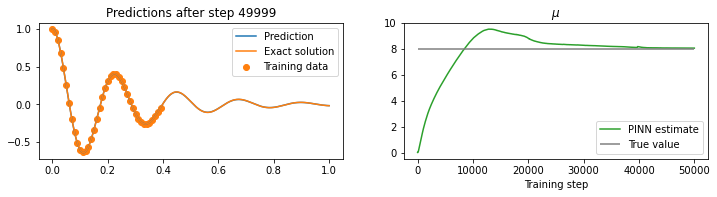

mu = 8.0, k = 1600.0
tensor(0.0128, grad_fn=<MeanBackward0>) tensor(2357.9180, grad_fn=<MeanBackward0>) tensor(0.1004, grad_fn=<MeanBackward0>)


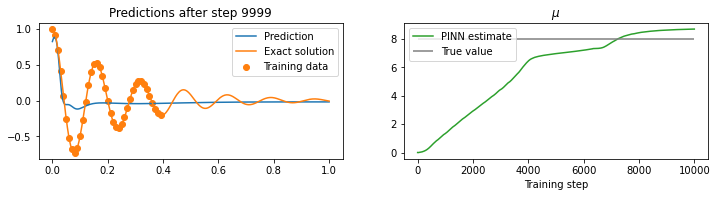

tensor(0.0004, grad_fn=<MeanBackward0>) tensor(71.3408, grad_fn=<MeanBackward0>) tensor(0.0867, grad_fn=<MeanBackward0>)


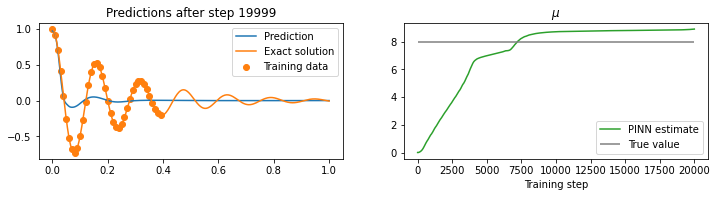

tensor(6.8086e-05, grad_fn=<MeanBackward0>) tensor(114.5394, grad_fn=<MeanBackward0>) tensor(0.0027, grad_fn=<MeanBackward0>)


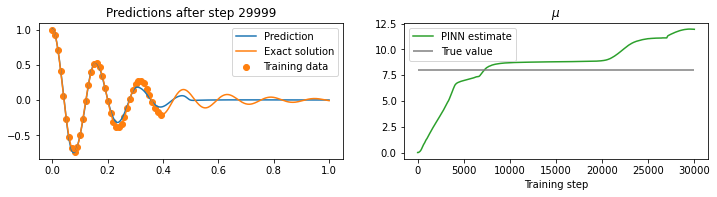

tensor(1.4653e-05, grad_fn=<MeanBackward0>) tensor(4.8695, grad_fn=<MeanBackward0>) tensor(0.0004, grad_fn=<MeanBackward0>)


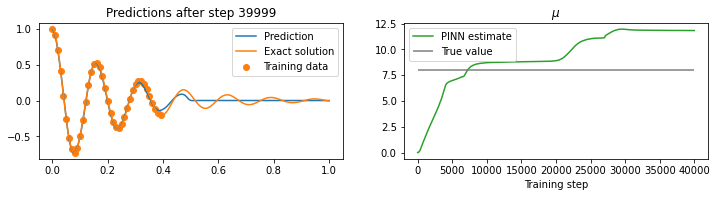

tensor(3.6744e-08, grad_fn=<MeanBackward0>) tensor(0.7874, grad_fn=<MeanBackward0>) tensor(0.0002, grad_fn=<MeanBackward0>)


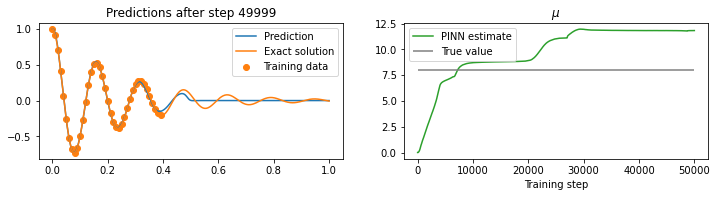

mu = 16.0, k = 400.0
tensor(0.0009, grad_fn=<MeanBackward0>) tensor(78.3753, grad_fn=<MeanBackward0>) tensor(0.0105, grad_fn=<MeanBackward0>)


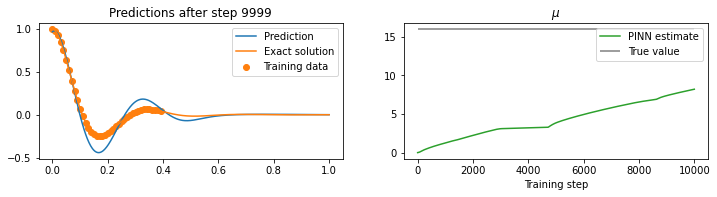

tensor(2.1027e-06, grad_fn=<MeanBackward0>) tensor(0.6694, grad_fn=<MeanBackward0>) tensor(0.0002, grad_fn=<MeanBackward0>)


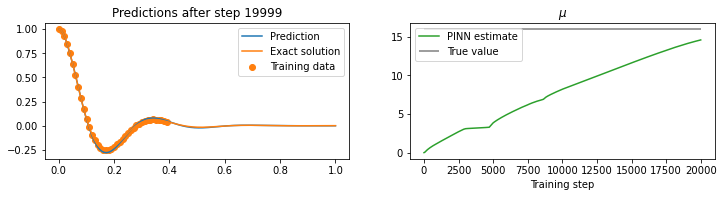

tensor(9.5107e-08, grad_fn=<MeanBackward0>) tensor(0.1159, grad_fn=<MeanBackward0>) tensor(1.4199e-06, grad_fn=<MeanBackward0>)


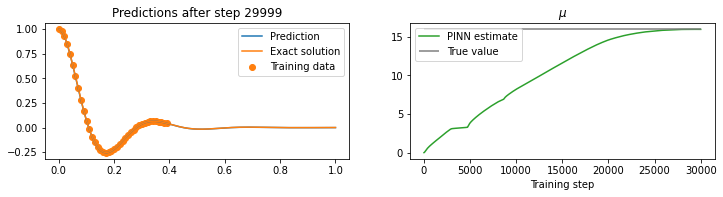

tensor(1.3206e-08, grad_fn=<MeanBackward0>) tensor(0.0213, grad_fn=<MeanBackward0>) tensor(3.0050e-07, grad_fn=<MeanBackward0>)


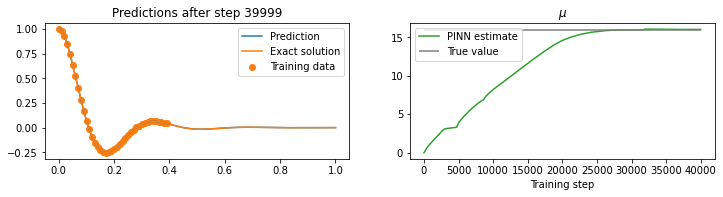

tensor(3.4905e-07, grad_fn=<MeanBackward0>) tensor(0.1857, grad_fn=<MeanBackward0>) tensor(4.2809e-07, grad_fn=<MeanBackward0>)


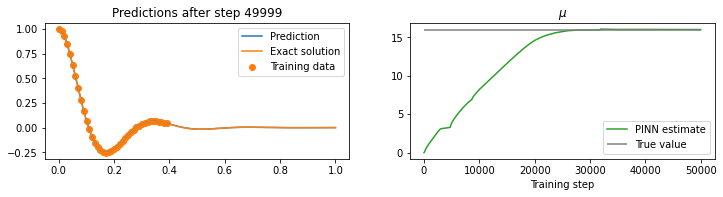

mu = 16.0, k = 800.0
tensor(0.0006, grad_fn=<MeanBackward0>) tensor(40.2660, grad_fn=<MeanBackward0>) tensor(0.0078, grad_fn=<MeanBackward0>)


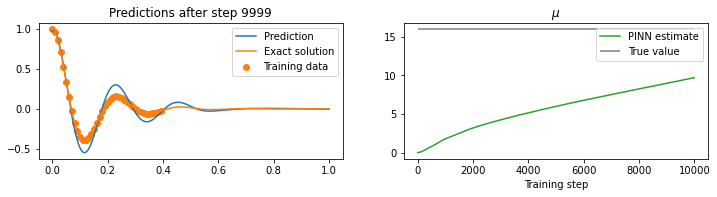

tensor(9.5088e-07, grad_fn=<MeanBackward0>) tensor(2.0593, grad_fn=<MeanBackward0>) tensor(6.5981e-05, grad_fn=<MeanBackward0>)


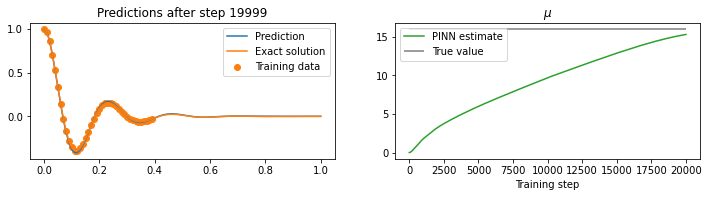

tensor(2.0112e-07, grad_fn=<MeanBackward0>) tensor(0.3633, grad_fn=<MeanBackward0>) tensor(1.1512e-06, grad_fn=<MeanBackward0>)


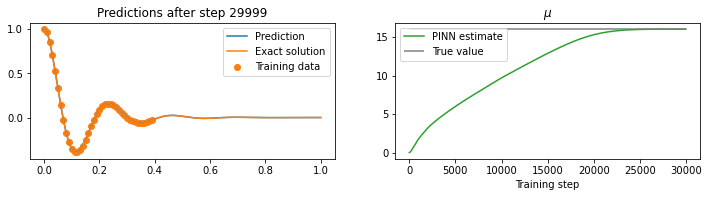

tensor(4.5081e-06, grad_fn=<MeanBackward0>) tensor(2.0344, grad_fn=<MeanBackward0>) tensor(5.5263e-06, grad_fn=<MeanBackward0>)


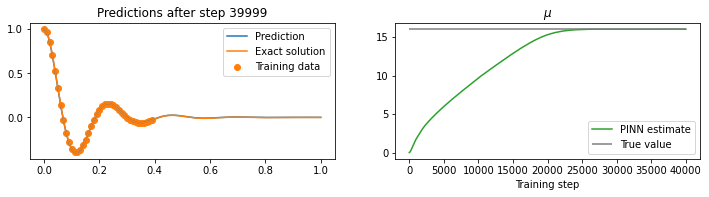

tensor(9.0962e-10, grad_fn=<MeanBackward0>) tensor(0.0062, grad_fn=<MeanBackward0>) tensor(1.4827e-07, grad_fn=<MeanBackward0>)


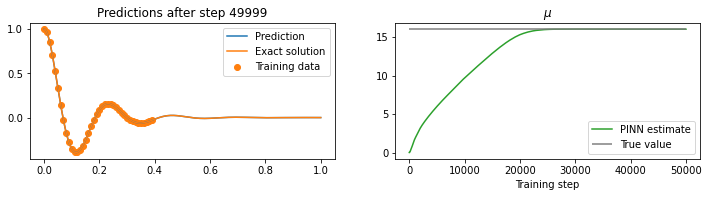

mu = 16.0, k = 1600.0
tensor(0.0003, grad_fn=<MeanBackward0>) tensor(318.5730, grad_fn=<MeanBackward0>) tensor(0.0028, grad_fn=<MeanBackward0>)


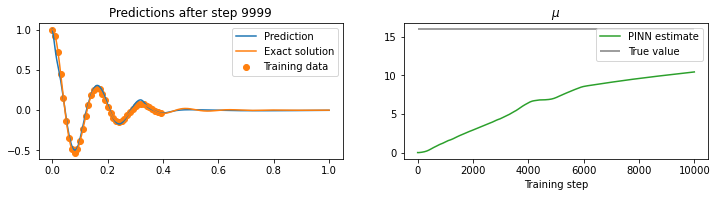

tensor(1.3687e-07, grad_fn=<MeanBackward0>) tensor(31.7103, grad_fn=<MeanBackward0>) tensor(0.0186, grad_fn=<MeanBackward0>)


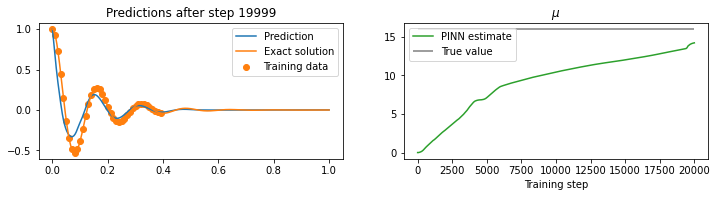

tensor(6.7337e-05, grad_fn=<MeanBackward0>) tensor(222.6165, grad_fn=<MeanBackward0>) tensor(0.0005, grad_fn=<MeanBackward0>)


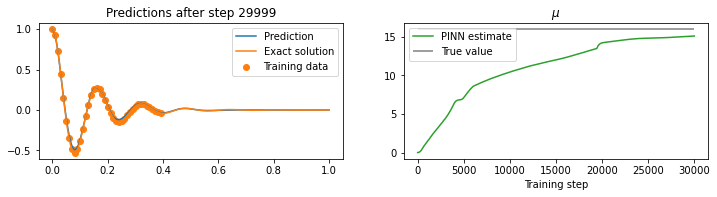

tensor(3.9558e-07, grad_fn=<MeanBackward0>) tensor(22.8970, grad_fn=<MeanBackward0>) tensor(7.1823e-05, grad_fn=<MeanBackward0>)


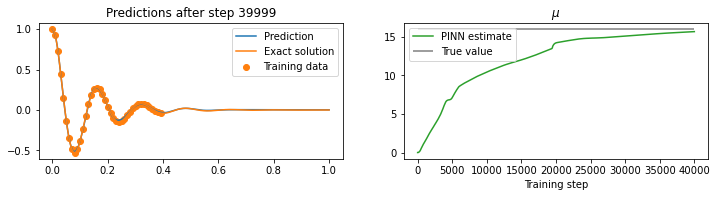

tensor(3.3419e-08, grad_fn=<MeanBackward0>) tensor(2.2241, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MeanBackward0>)


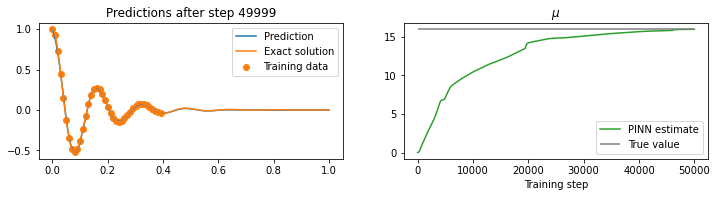

In [9]:
physics_xs = torch.linspace(0, 1, 40).view(-1, 1).requires_grad_(True)

for i, [d, w0] in enumerate(par_train):
  print(f'mu = {d*2}, k = {w0 ** 2}')
    
  data_x = x_train[i]
  data_x = data_x[:, None]
  data_y = y_train[i]
  data_y = data_y[:, None]

  # mu, k = 2*d, w0**2
  k = w0 ** 2
  mu = torch.nn.Parameter(torch.zeros(1, requires_grad=True))

  torch.manual_seed(123)
  model = FullyConnected(1, 64, 1)
  optimizer2 = torch.optim.Adam(list(model.parameters())+ [mu], lr=1e-3)#, weight_decay=1e-4)
  scheduler = StepLR(optimizer2, step_size=10000, gamma=0.9)

  mus = []
  # ks = []
  for i in range(50001):
    optimizer2.zero_grad()

    # data loss
    pred_y = model(data_x)
    data_loss = torch.mean((pred_y - data_y) ** 2) # Mean squared error

    # physics loss
    physics_pred_y = model(physics_xs)
    dx = torch.autograd.grad(physics_pred_y, physics_xs, torch.ones_like(physics_pred_y), create_graph=True)[0]
    dx2 = torch.autograd.grad(dx, physics_xs, torch.ones_like(dx), create_graph=True)[0]
    residual = dx2 + mu * dx + k * physics_pred_y
    physics_loss = torch.mean(residual**2)

    # boundary conditions loss
    t_boundary = torch.zeros(1, requires_grad=True) # torch.tensor([0])
    x_boundary = torch.ones(1, requires_grad=True) #torch.tensor([1])
    # dx_boundary = torch.zeros(1, requires_grad=True) #torch.tensor([0])
    x0_predicted = model(t_boundary)
    dx_predicted = torch.autograd.grad(x0_predicted, t_boundary, torch.ones_like(t_boundary), create_graph=True)[0]
    residual_x0 = x0_predicted - x_boundary
    # residual_dx = dx_predicted
    boundary_loss = torch.mean(residual_x0 ** 2) #+ torch.mean(residual_dx ** 2)

    loss = (1e-4) * physics_loss + data_loss + boundary_loss
    loss.backward()
    optimizer2.step()
    scheduler.step()

    # record parameter values
    mus.append(mu.item())
    # ks.append(k.item())

    if (i+1) % 10000 == 0:
      detached_t = physics_xs.detach()
      print(boundary_loss, physics_loss, data_loss)

      # get the analytical and predicted solution over the full domain
      x = torch.linspace(0,1,500).view(-1,1)
      y = oscillator(d, w0, x).view(-1,1)
      pred_ys = model(x).detach()

      plt.figure(figsize=(12,2.5))

      plt.subplot(1,2,1)
      plt.plot(x, pred_ys, color="tab:blue", label="Prediction")
      plt.plot(x, y, color="tab:orange", label="Exact solution")
      # plt.scatter(detached_t, torch.zeros_like(detached_t))
      plt.scatter(data_x, data_y, color="tab:orange", label="Training data")
      plt.title(f'Predictions after step {i}')
      plt.legend()

      plt.subplot(1,2,2)
      plt.title("$\mu$")
      plt.plot(mus, label="PINN estimate", color="tab:green")
      plt.hlines(2*d, 0, len(mus), label="True value", color="tab:grey")
      plt.xlabel("Training step")
      plt.legend()

      # plt.subplot(1,3,3)
      # plt.title("$k$")
      # plt.plot(mus, label="PINN estimate", color="tab:green")
      # plt.hlines(w0 ** 2, 0, len(mus), label="True value", color="tab:grey")
      # plt.xlabel("Training step")
      # plt.legend()
      
      plt.show()


